# CHEM277B Homework 5
### Trevor Oldham


### Problem 1
### (A)

We are given the probabilities as follows: 

P(+|M) = 0.95 - the probability that a person with the marker has a positive test.

P(-|~M) = 0.95 - the probability that a person without the marker tests negative.

P(M) = 0.01 - the probability that a person has the marker.

We can calculate the probability of P(-|M), P(+|M), and P(~M).

P(~M) = 0.99 - the probability that a person does not have the marker

P(-|M) = (0.01)(0.05) = 0.0005 - the probability that a person has the marker but has a negative test

P(+|~M) = (0.99)(0.05) = 0.0495 - the probability that a person does not have the marker but has a positive test

### (B)

We can then use Bayes Theorem to calculate P(M|+) which is the probability that a person with a positive test actually has the marker.

$$ P(M|+) = \frac{P(+|M)P(M)}{P(+)}$$

P(+) = (0.01)(0.95) + (0.99)(0.05) = 0.059

$$ P(M|+) = \frac{(0.95)(0.01)}{0.059} = 0.161$$

So given a positive test, the person has a 16% chance of actually having the marker.

### (C)

If the probability of having the marker were increased to 0.10, what would be the probability of P(M|+)?

We are given the probabilities as follows: 

P(+|M) = 0.95 - the probability that a person with the marker has a positive test.

P(-|~M) = 0.95 - the probability that a person without the marker tests negative.

P(M) = 0.1 - the probability that a person has the marker.

We can calculate the probability of P(-|M), P(+|M), and P(~M).

P(~M) = 0.90 - the probability that a person does not have the marker

P(-|M) = (0.10)(0.05) = 0.005 - the probability that a person has the marker but has a negative test

P(+|~M) = (0.90)(0.05) = 0.045 - the probability that a person does not have the marker but has a positive test


$$ P(M|+) = \frac{(0.95)(0.10)}{0.14} = 0.679$$

This shows that the probability of correctly identifying people with the marker rises to 67.9 percent when the incidence of the marker is increased by ten times.

### Problem 2
### (A)

In [1]:
import pandas as pd
import math
import numpy as np
wines = pd.read_csv('wines.csv')
display(wines)

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


In [2]:
wines = wines.drop(columns = ['Start assignment'])
wines_normalized = (wines - wines.mean()) / wines.std()
wines_normalized['ranking'] = wines['ranking']
wines_normalized

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,ranking
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,1
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,1
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,3
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,3
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,3
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,3


We choose to use the Naive Bayes Classifier method which calculates the gaussian distribution which can tell us the probability of P(wine attribute x | classifier). 

$$ P(x_j | c) = \frac{1}{\sqrt{2 \pi \sigma_{jc}^2}} exp(- \frac{x_j - m_{jc}}{2 \sigma_{jc}^2} )$$

where $\sigma_{jc}$ is the standard deviation of the $j$'th feature for a given class $c$ and $m_{jc}$ is the mean of the $j$'th feature in class $c$.

To calculate the probability of an alcohol content of 13% given class 1, we first get the mean and standard deviation of the alcohol content for class 1.

In [3]:
means_df = wines.groupby('ranking').mean()
display(means_df)

std_df = wines.groupby('ranking').std()
display(std_df)

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
ranking,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
ranking,,,,,,,,,,,,,
1,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
2,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
3,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.124140,0.408836,2.310942,0.114441,0.272111,115.097043


Then we plug in the values of mean and stddev to calculate P(alcohol % = 13 | class 1)

$$ P(alcohol = 13 | class 1 ) = \frac{1}{\sqrt{2 \pi (0.462125)^2}} exp(- \frac{13 - 13.744746}{2 (0.462125)^2} )$$
$$ P(alcohol = 13 | class 1 ) = 0.160 $$

In [4]:
def gaussian(x, mean, std):
        return (1/(2*math.pi*std)**(1/2))*math.exp((-(x - mean)**2)/(2*std**2))
    
p = gaussian(13,13.744746,0.462125)
p

0.16016435168863044

In [5]:
class NaiveBayesClassifier():
    def __init__(self):
        self.type_indices={}    # store the indices of wines that belong to each cultivar as a boolean array of length 178
        self.type_stats={}      # store the mean and std of each cultivar
        self.ndata = 0
        self.trained=False
    
    @staticmethod
    def gaussian(x,mean,std):
        return (1/(2*math.pi*std)**(1/2))*math.exp((-(x - mean)**2)/(2*std**2))
    
    @staticmethod
    def calculate_statistics(x_values):
        # Returns a list with length of input features. Each element is a tuple, with the input feature's average and standard deviation
        n_feats=x_values.shape[1]
        return [(np.average(x_values[:,n]),np.std(x_values[:,n])) for n in range(n_feats)]
    
    @staticmethod
    def calculate_prob(x_input,stats):
        """Calculate the probability that the input features belong to a specific class(P(X|C)), defined by the statistics of features in that class
        x_input: np.array shape(nfeatures)
        stats: list of tuple [(mean1,std1),(means2,std2),...]
        """ 
        init_prob = 1
        for i in range(len(x_input[1])):
            init_prob = init_prob * NaiveBayesClassifier.gaussian(x_input[i], stats[i][0], stats[i][1])
        return init_prob
    
    def fit(self,xs,ys):
        # Train the classifier by calculating the statistics of different features in each class
        self.ndata = len(ys)
        for y in set(ys):
            type_filter= (ys==y)
            self.type_indices[y]=type_filter
            self.type_stats[y]=self.calculate_statistics(xs[type_filter])
        self.trained=True
        
            
    def predict(self,xs):
        # Do the prediction by outputing the class that has highest probability
        if (xs.shape[1])>1:
            print("Only accepts one sample at a time!")
        if self.trained:
            guess=None
            max_prob=0
            # P(C|X) = P(X|C)*P(C) / sum_i(P(X|C_i)*P(C_i)) (deniminator for normalization only, can be ignored)
            for y_type in self.type_stats:
                p_type = (np.sum([self.type_indices[y_type] == True])/len(self.type_indices[y_type]))
                prob= NaiveBayesClassifier.calculate_prob(xs, self.type_stats[y_type])*p_type
                if prob>max_prob:
                    max_prob=prob
                    guess=y_type
            return guess
        else:
            print("Please train the classifier first!")

In [6]:
model = NaiveBayesClassifier()

In [7]:
x_1 = wines_normalized.iloc[0]
x_1 = x_1.to_numpy().reshape(-1, 1)
x_1.shape

(14, 1)

In [8]:
class_1 = wines_normalized[wines_normalized['ranking'] == 1].to_numpy()
class_2 = wines_normalized[wines_normalized['ranking'] == 2].to_numpy()
class_3 = wines_normalized[wines_normalized['ranking'] == 3].to_numpy()
stats_1 = model.calculate_statistics(class_1)
stats_2 = model.calculate_statistics(class_2)
stats_3 = model.calculate_statistics(class_3)
len(stats_1)

14

In [9]:
model.calculate_prob(x_1, stats_1)

0.30308370896130926

In [10]:
model.fit(wines_normalized.drop(columns=['ranking']).to_numpy(), wines_normalized['ranking'].to_numpy())

In [11]:
print(model.predict(x_1))

1


### (B)

Divide the normalized features into three sets, each set uses 2/3 of the data for training and 1/3 of the data for testing.

In [12]:
from sklearn.model_selection import train_test_split,KFold

In [13]:
def calculate_accuracy(model,xs,ys):
    y_pred=np.zeros_like(ys)
    for idx,x in enumerate(xs):
        x = x.reshape(-1, 1)
        y_pred[idx]=model.predict(x)
    return np.sum(ys==y_pred)/len(ys)

In [14]:
def Kfold(k,Xs, ys):
    # The total number of examples for training the network
    total_num=len(Xs)
    
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    
    for train_selector,test_selector in kf.split(range(total_num)):
        ### Decide training examples and testing examples for this fold ###
        train_Xs= Xs[train_selector]
        test_Xs=  Xs[test_selector]
        train_ys= ys[train_selector]
        test_ys= ys[test_selector]
       
        model = NaiveBayesClassifier()
        
        train_in,val_in,train_real,val_real=train_test_split(train_Xs,train_ys, train_size = 0.666)
        
        model.fit(train_in, train_real)
        
        print("The accuracy of this fold is ", calculate_accuracy(model, val_in, val_real))
        
    return 
        

The Kfold function splits the data into three sets and runs the function calculate_accuracy to output the ratio of successful matches using the Naive Bayes Classifier. Here it returns a value of 70 percent accuracy on the first fold and 62.5% accuracy on the second fold, and 72.5% on the third fold, which is less accurate than the clustering method used in HW2 but still very effective.

In [15]:
np.random.seed(0)
x_values = wines_normalized.drop(columns = ['ranking']).to_numpy()
print(x_values.shape)
print(x_values[0].shape)
y_values = wines_normalized['ranking'].to_numpy()
Kfold(3, x_values, y_values)

(178, 13)
(13,)
The accuracy of this fold is  0.7
The accuracy of this fold is  0.625
The accuracy of this fold is  0.725


### Problem 3

### (A)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def generate_X(number):
    xs=(np.random.random(number)*2-1)*2
    ys=(np.random.random(number)*2-1)*2
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=(1-xs)**2+10*(ys-xs**2)**2
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)]),fs*stochastic_ratio

In [17]:
from torch import nn
import torch

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(13, 3),
            nn.Softmax()
        )
        
    def forward(self, x):
        return self.layers(x)

The values of x and y are taken from the wines dataframe and converted to torch.tensor, then a new MLP object is created and we call the predict() function on the x values to output the prediction.

In [18]:
np.random.seed(0)
x_values = wines_normalized.drop(columns = ['ranking']).to_numpy()
print(x_values.shape)
y_values = wines_normalized['ranking'].to_numpy()
y_values = y_values - 1

    
x_values = torch.tensor(x_values, dtype=torch.float32)
y_values = torch.tensor(y_values, dtype=torch.float32)

print(x_values.shape)
print(y_values.shape)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


(178, 13)
torch.Size([178, 13])
torch.Size([178])


In [19]:
#Pass the data through the network without backpropagation and print the output.
net = MLP()
layers = net.forward(x_values)
print(layers)

tensor([[0.4359, 0.3438, 0.2203],
        [0.2319, 0.2892, 0.4789],
        [0.4531, 0.3826, 0.1643],
        [0.6256, 0.2235, 0.1509],
        [0.5477, 0.2894, 0.1630],
        [0.4221, 0.2766, 0.3014],
        [0.2981, 0.4604, 0.2415],
        [0.4767, 0.2785, 0.2448],
        [0.4840, 0.2502, 0.2658],
        [0.5116, 0.2968, 0.1916],
        [0.5055, 0.3087, 0.1857],
        [0.3790, 0.3067, 0.3143],
        [0.3217, 0.3176, 0.3608],
        [0.3961, 0.3250, 0.2789],
        [0.3947, 0.3402, 0.2651],
        [0.2510, 0.5161, 0.2328],
        [0.3872, 0.3747, 0.2381],
        [0.5847, 0.2610, 0.1543],
        [0.2491, 0.5267, 0.2241],
        [0.2966, 0.4504, 0.2530],
        [0.2556, 0.4124, 0.3320],
        [0.0968, 0.7001, 0.2031],
        [0.1731, 0.7220, 0.1049],
        [0.3955, 0.2735, 0.3311],
        [0.2536, 0.3128, 0.4336],
        [0.3493, 0.3407, 0.3099],
        [0.1854, 0.4650, 0.3497],
        [0.2785, 0.4578, 0.2637],
        [0.3195, 0.3194, 0.3611],
        [0.368

/Users/trevor/opt/miniconda3/envs/msse-python/lib/python3.9/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


By feeding foward the initial training data we get one (n x 3) matrix which holds the probability of the datapoint falling into one of three categories. The probabilities add up to one because of the softmax function. Without the softmax function, I tried the ReLU function which returned values which were either positive or negative and did not reflect the probability of each class.

### (B)

A function train_and_val() is used to train the MLP object based on the x values from the wines dataframe. This function uses three-fold validation to train the MLP using 2/3 of the values as training data and then 1/3 of the values for test data. The training continues for a 500 epochs and the epoch with the lowest loss is reported. Finally the best weights are saved and loaded into the model which is returned to the user.

In [20]:
# you can use this framework to do training and validation           
def train_and_val(model,Xs,ys,epochs,draw_curve=True):
    """
    Parameters
    --------------
    model: a PyTorch model
    train_X: np.array shape(ndata,nfeatures)
    train_y: np.array shape(ndata)
    epochs: int
    draw_curve: bool
    """
    ### Define your loss function, optimizer. Convert data to torch tensor ###
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    
    total_num=len(Xs)
    kf=KFold(n_splits=3,shuffle=True)
    
    for train_selector,test_selector in kf.split(range(total_num)):
        ### Decide training examples and testing examples for this fold ###
        train_Xs= Xs[train_selector]
        test_Xs=  Xs[test_selector]
        train_ys= ys[train_selector]
        test_ys= ys[test_selector]
        
        best_loss = float('inf')
        best_weights = []
    
        ### Split training examples further into training and validation ###

        val_array=[]
    
   
    
        for i in range(epochs):
            ### Compute the loss and do backpropagation ###
        
            train_in,val_in,train_real,val_real=train_test_split(train_Xs,train_ys, train_size = 0.8)
        
            train_X = torch.tensor(train_in, dtype=torch.float32)
            train_y = torch.tensor(train_real, dtype=torch.long)
            test_X = torch.tensor(val_in, dtype=torch.float32)
            test_y = torch.tensor(val_real, dtype=torch.long)
        
            order=list(range(train_X.shape[0]))
            np.random.shuffle(order)
            batch_size = 1
            n=0
            while n<math.ceil(len(order)/batch_size)-1: # Parts that can fill one batch
                pred = model.forward(train_X[order[n*batch_size:(n+1)*batch_size]]) 
                loss = loss_func(pred, train_y[order[n*batch_size:(n+1)*batch_size]])
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                n+=1
            # Parts that cannot fill one batch
            pred = model.forward(train_X[order[n*batch_size:]])
            loss = loss_func(pred, train_y[order[n*batch_size:(n+1)*batch_size]])
            
            #print("training loss ", loss)
        
            ##set optimizer grad to zero, important,before step()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            ### compute validation loss and keep track of the lowest val loss ###
            pred = model.forward(test_X)
            loss = loss_func(pred, test_y)
            
            if loss.item() < best_loss:
                best_weights = model.state_dict()
                best_loss = loss.item()   
        
            val_array.append(loss.item())

                
        # The final number of epochs is when the minimum error in validation set occurs    
        final_epochs=np.argmin(val_array)+1
        print("Number of epochs with lowest validation:",final_epochs)
        ### Recover the model weight ###
    
    model.load_state_dict(best_weights)

    if draw_curve:
        plt.figure()
        plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    return model
        


<ipython-input-20-250d04ec446e>:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = torch.tensor(train_in, dtype=torch.float32)
<ipython-input-20-250d04ec446e>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_real, dtype=torch.long)
<ipython-input-20-250d04ec446e>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = torch.tensor(val_in, dtype=torch.float32)
<ipython-input-20-250d04ec446e>:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

Number of epochs with lowest validation: 135
Number of epochs with lowest validation: 152
Number of epochs with lowest validation: 154


<IPython.core.display.Javascript object>


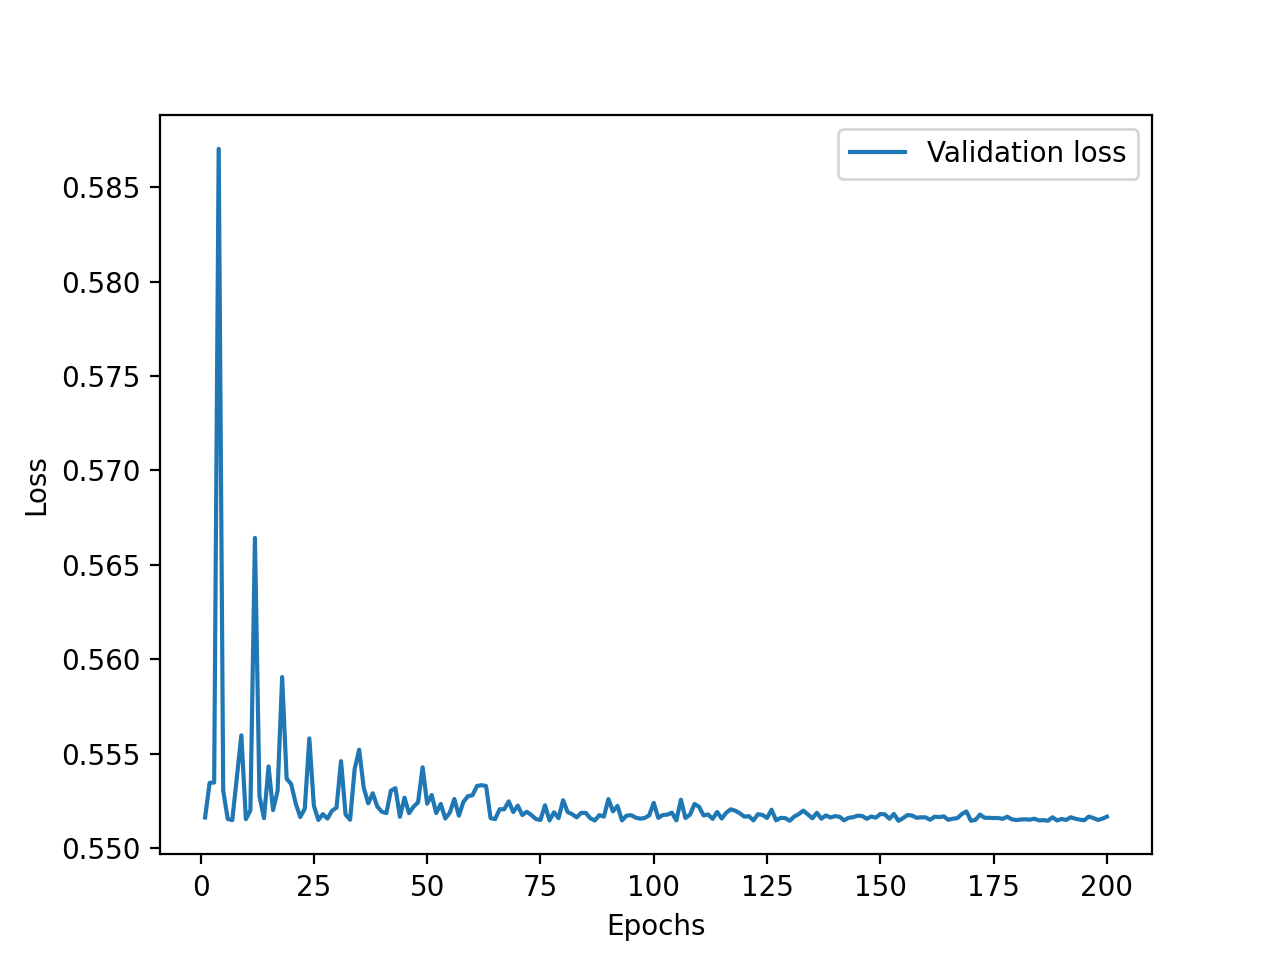

MLP(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [23]:
#running the train and validate function 
net = MLP()
train_and_val(net, x_values ,y_values,epochs=200,draw_curve=True)